In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if os.getcwd().split("/")[-1] !="project":
    os.chdir("..")

result_file="result/results.txt"

result = pd.read_csv(result_file)
print list(result.columns.values)

use = ["patch.size", "patch.scale", "patch.num", "model.name", "model.architecture",
       "model.dropout", "run.time", "run.score"]

result=result[use]
result["run.time"] /= 3600

vanilla_result = result[result["model.architecture"] == "vanilla_unet"]
rob_result = result[result["model.architecture"] =="rob_unet"]
dil_result = result[result["model.architecture"] =="dil_unet"]


result['arch_int'] = np.nan
result.loc[result["model.architecture"] == 'vanilla_unet', 'arch_int'] = 0
result.loc[result["model.architecture"] == 'rob_unet', 'arch_int'] = 1
result.loc[result["model.architecture"] == 'dil_unet', 'arch_int'] = 2


['augument.cval', 'augument.data_format', 'augument.fill_mode', 'augument.height_shift_range', 'augument.horizontal_flip', 'augument.rotation_range', 'augument.shear_range', 'augument.width_shift_range', 'augument.zoom_range', 'file.img', 'file.label', 'file.leaveOut', 'file.name', 'file.out', 'model.architecture', 'model.dropout', 'model.early_stopping', 'model.epoch', 'model.monitor', 'model.name', 'model.path', 'model.patience', 'patch.norm', 'patch.num', 'patch.rgb', 'patch.scale', 'patch.size', 'run.score', 'run.system', 'run.time']


These are the relevant ones:

- **patch:** size, scale,  num
- **model:** name, architecture, dropout
- **run:** score, time
- **augument:** - 



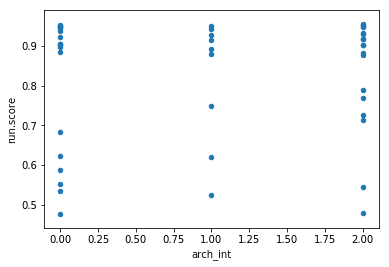

In [2]:
result['arch_int'] = np.nan
result.loc[result["model.architecture"] == 'vanilla_unet', 'arch_int'] = 0
result.loc[result["model.architecture"] == 'rob_unet', 'arch_int'] = 1
result.loc[result["model.architecture"] == 'dil_unet', 'arch_int'] = 2

result.plot.scatter("arch_int","run.score")

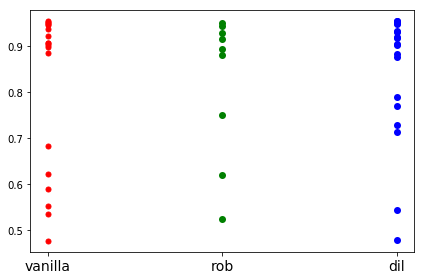

In [23]:
#import itertools
#data
#extra setup
#plt.rcParams['xtick.major.pad'] = 8
#plotting style(s)
#marker = itertools.cycle((',', '+', '.', 'o', '*'))
#color = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))
#plot
df1 = pd.DataFrame({'id': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]})
df2 = pd.DataFrame({'id': [2,2,2,2,2,2,2,2,2]})
df3 = pd.DataFrame({'id': [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]})
df0 = pd.DataFrame({'name': ["vanilla","rob", "dil"]})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df1['id'], vanilla_result['run.score'], ls='', ms=10, mew=1,
         marker=".",color='r')
ax.plot(df2['id'], rob_result['run.score'], ls='', ms=10, mew=2,
         marker=".",color='g')
ax.plot(df3['id'], dil_result['run.score'], ls='', ms=10, mew=2,
         marker=".",color='b')
# set the tick labels
ax.xaxis.set_ticks([1,2,3])
ax.xaxis.set_ticklabels(["vanilla","rob","dil"])
plt.setp(ax.get_xticklabels(),  fontsize=14)
plt.tight_layout()


10 20 15
doodoo


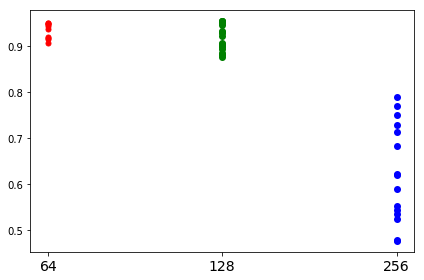

In [22]:

print len(result[result["patch.size"] ==64]),len(result[result["patch.size"] ==128]),len(result[result["patch.size"] ==256])

result['pat_int'] = np.nan
result.loc[result["patch.size"] ==64, 'pat_int'] = 0
result.loc[result["patch.size"] ==128, 'pat_int'] = 1
result.loc[result["patch.size"] ==256, 'pat_int'] = 2
print "doodoo"

df1 = pd.DataFrame({'id': np.ones(len(result[result["patch.size"] ==64]))})
df2 = pd.DataFrame({'id': 2*np.ones(len(result[result["patch.size"] ==128]))})
df3 = pd.DataFrame({'id': 3*np.ones(len(result[result["patch.size"] ==256]))})
df0 = pd.DataFrame({'name': ["64","128", "256"]})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df1['id'], result[result["patch.size"] ==64]['run.score'], ls='', ms=10, mew=1,
         marker=".",color='r')
ax.plot(df2['id'], result[result["patch.size"] ==128]['run.score'], ls='', ms=10, mew=2,
         marker=".",color='g')
ax.plot(df3['id'], result[result["patch.size"] ==256]['run.score'], ls='', ms=10, mew=2,
         marker=".",color='b')
# set the tick labels
ax.xaxis.set_ticks([1,2,3])
ax.xaxis.set_ticklabels(["64","128","256"])
plt.setp(ax.get_xticklabels(),  fontsize=14)
plt.tight_layout()


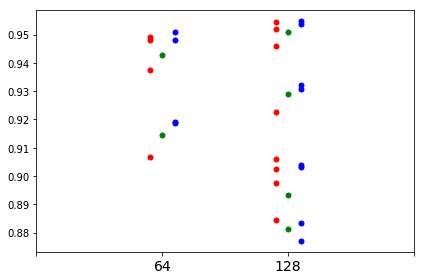

In [3]:
size64= result["patch.size"]==64
size128= result["patch.size"]==128
netvan=   result["model.architecture"]=="vanilla_unet"
netrob=   result["model.architecture"]=="rob_unet"
netdil=   result["model.architecture"]=="dil_unet"

van64= np.logical_and(size64,netvan)
van128=  np.logical_and(size128,netvan)
rob64=  np.logical_and(size64,netrob)
rob128=  np.logical_and(size128,netrob)
dil64=  np.logical_and(size64,netdil)
dil128=  np.logical_and(size128,netdil)


df1 = pd.DataFrame({'id': 0.9*np.ones(sum(van64))}) # 
df2 = pd.DataFrame({'id': 1.9*np.ones(sum(van128))})
df3 = pd.DataFrame({'id': np.ones(sum(rob64))}) # 
df4 = pd.DataFrame({'id': 2*np.ones(sum(rob128))})
df5 = pd.DataFrame({'id': 1.1*np.ones(sum(dil64))}) # 
df6 = pd.DataFrame({'id': 2.1*np.ones(sum(dil128))})


fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(df1['id'], result[van64]['run.score'], ls='', ms=10, mew=1,
        marker=".", color='r')
ax.plot(df3['id'], result[rob64]['run.score'], ls='', ms=10, mew=1,
         marker=".",color='g')
ax.plot(df5['id'], result[dil64]['run.score'], ls='', ms=10, mew=1,
         marker=".",color='b')

ax.plot(df2['id'], result[van128]['run.score'], ls='', ms=10, mew=1,
         marker=".",color='r')
ax.plot(df4['id'], result[rob128]['run.score'], ls='', ms=10, mew=1,
         marker=".",color='g')
ax.plot(df6['id'], result[dil128]['run.score'], ls='', ms=10, mew=1,
         marker=".",color='b')


# set the tick labels
ax.xaxis.set_ticks([0,1,2,3])
ax.xaxis.set_ticklabels(["","64","128"])
plt.setp(ax.get_xticklabels(),  fontsize=14)
plt.tight_layout()

In [4]:
import nibabel as nib
import keras 
from src.rob import *
from src.dataset import *
from src.data_loader import *
from src.keras_krap import *

whatever_config= os.listdir("config")[0]
patch_info=training_img("config/"+whatever_config)    
model_info=training_opt("config/"+whatever_config)

period=16


img = nib.load("../../../data/img/"+"SNL_acq1_rep1_Sequence_Number_13_0_1.nii.gz")
img = img.get_data()
img = img.transpose(2,0,1)




/project/6003792/amdanko/car/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
models = np.array(result[size64]["model.name"])
patch=np.array(result[size64]["model.name"])
patch = [p.split("p")[1] for p in patch]
patch = ["p"+p for p in patch]


for i in range(len(models)):
    if "vanilla" in models[i]:
        models[i] = "result/vanilla_unet/"+models[i]+".hdf5"
    elif "rob" in models[i]:
        models[i] = "result/rob_unet/"+models[i]+".hdf5"
    elif "dil" in models[i]:
        models[i] = "result/dil_unet/"+models[i]+".hdf5"
        
#models = [model_info.model_path+"/"+x+".hdf5" for x in models]



In [7]:
predicted_imgs=[]

for i in range(len(models)):
    print "iteration ", i,"/",len(models)
    mean_t, std_t = np.load(os.path.join(patch_info.out_path,patch[i]+"_meanstd.npy"))

    if "vanilla" in models[i]:
        unet = vanilla_unet()
    elif "rob" in models[i]:
        unet = rob_unet()
    elif "dil" in models[i]:
        unet = dil_unet()
        

    unet.load_weights(models[i])



    img_rgb = rgb_images(img,period)
    img_rgb = 100.0*(img_rgb-img_rgb.min(axis=(1,2),keepdims = True))/(img_rgb.max(axis=(1,2),keepdims = True)
                                                                       -img_rgb.min(axis=(1,2),keepdims = True))
    img_rgb-=mean_t
    img_rgb/=std_t
    img_rgb,nw,nz  = pad_images(img_rgb)

    predict = unet.predict(img_rgb)
    print predict.shape
    predict = predict.transpose(1,2,0,3)[:-nw,:-nz,:,0]
    print predict.shape
    
    predicted_imgs.append(predict )
    


iteration  0 / 10


src/keras_krap.py:81: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input=inputs, output=conv10)


(16, 272, 256, 1)
(256, 252, 16)
iteration  1 / 10
(16, 272, 256, 1)
(256, 252, 16)
iteration  2 / 10
(16, 272, 256, 1)
(256, 252, 16)
iteration  3 / 10
(16, 272, 256, 1)
(256, 252, 16)
iteration  4 / 10


src/keras_krap.py:140: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input=inputs, output=conv10)


(16, 272, 256, 1)
(256, 252, 16)
iteration  5 / 10
(16, 272, 256, 1)
(256, 252, 16)
iteration  6 / 10


src/keras_krap.py:204: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input=inputs, output=conv10)


(16, 272, 256, 1)
(256, 252, 16)
iteration  7 / 10
(16, 272, 256, 1)
(256, 252, 16)
iteration  8 / 10
(16, 272, 256, 1)
(256, 252, 16)
iteration  9 / 10
(16, 272, 256, 1)
(256, 252, 16)


In [11]:
predicted_imgs= predicted_imgs.transpose(2,1,2)
npy_064 = [m[:-5]+"_SNL06.npy" for m in models]
#only 

for i in range(len(models)):
    np.save(np_064,predicted_imgs[i][:,:,6])

['vanilla_unet_d00_p128_s100_n10.hdf5', 'vanilla_unet_d25_p64_s100_n10.txt', 'vanilla_unet_d25_p128_s100_n10.txt', 'vanilla_unet_d25_p128_s050_n10.hdf5', 'vanilla_unet_d00_p128_s100_n5.txt', 'vanilla_unet_d25_p256_s025_n5.hdf5', 'vanilla_unet_d25_p256_s100_n5.hdf5', 'vanilla_unet_d25_p128_s100_n5_val_dice_coef.npy', 'vanilla_unet_d25_p256_s050_n5_val_dice_coef.npy', 'vanilla_unet_d00_p128_s100_n10_val_dice_coef.npy', 'vanilla_unet_d00_p256_s025_n5.txt', 'vanilla_unet_d25_p256_s100_n5_val_dice_coef.npy', 'vanilla_unet_d25_p128_s100_n10_val_dice_coef.npy', 'vanilla_unet_d25_p128_s050_n5.txt', 'vanilla_unet_d00_p128_s050_n5.hdf5', 'vanilla_unet_d25_p128_s050_n10_val_dice_coef.npy', 'vanilla_unet_d25_p256_s050_n5.hdf5', 'vanilla_unet_d00_p64_s100_n5.hdf5', 'vanilla_unet_d25_p256_s025_n5.txt', 'vanilla_unet_d25_p256_s050_n5.txt', 'vanilla_unet_d25_p256_s025_n5_val_dice_coef.npy', 'vanilla_unet_d00_p64_s100_n10.txt', 'vanilla_unet_d00_p64_s100_n5_val_dice_coef.npy', 'vanilla_unet_d00_p128_s0

In [8]:

van= np.where(["vanilla" in m for m in models])[0]
rob=np.where(["rob" in m for m in models])[0]
dil=np.where(["dil" in m for m in models])[0]

van_img = [predicted_imgs[i] for i in van]
van_models = [models[i].split("/")[-1] for i in van]

rob_img = [predicted_imgs[i] for i in rob]
rob_models = [models[i].split("/")[-1] for i in rob]

dil_img = [predicted_imgs[i] for i in dil]
dil_models = [models[i].split("/")[-1] for i in dil]




In [48]:
print img.shape, van_img[0].shape

(16, 256, 252) (256, 252, 16)


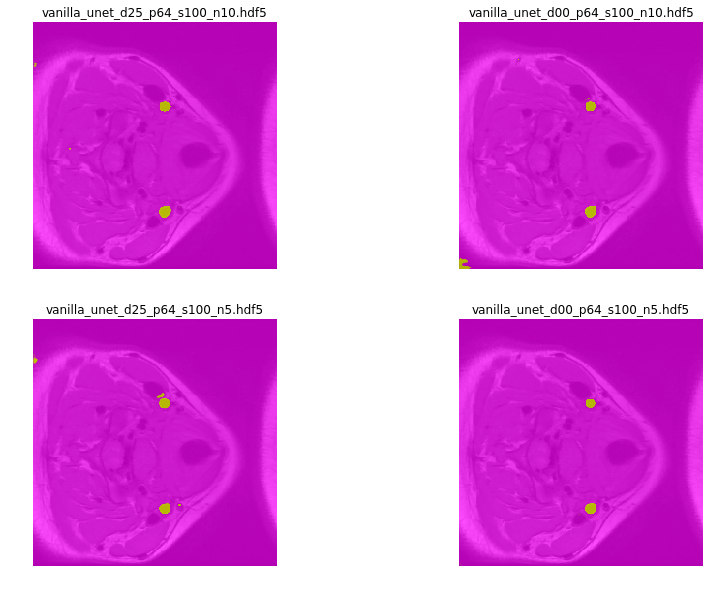

In [54]:
#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (14,10))

for i in range(4):
    ok = fig.add_subplot(2,2, cc) 
    plt.axis("off")
    plt.title(van_models[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(van_img[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

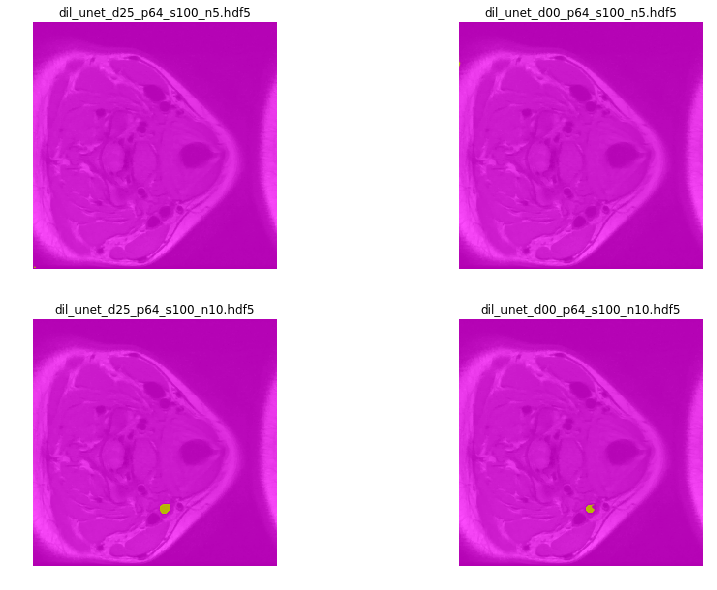

In [57]:
#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (14,10))

for i in range(4):
    ok = fig.add_subplot(2,2, cc) 
    plt.axis("off")
    plt.title(dil_models[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(dil_img[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

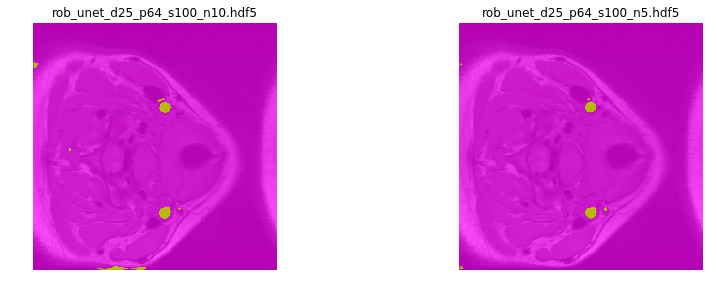

In [58]:
#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (14,10))

for i in range(2):
    ok = fig.add_subplot(2,2, cc) 
    plt.axis("off")
    plt.title(rob_models[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(rob_img[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

In [18]:
from skimage import measure
from skimage import filters 
blobr=measure.label(rob_img[0][:,:,6])
blobv=measure.label(van_img[0][:,:,6])
blobd=measure.label(dil_img[0][:,:,6])

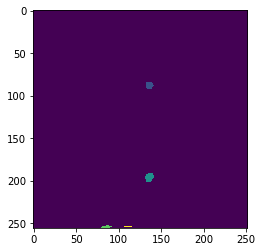

In [19]:
plt.imshow(blob)

In [20]:
np.unique(blob)

array([0, 1, 2, 3, 4])

In [21]:

models = np.array(result[size128]["model.name"])
patch=np.array(result[size128]["model.name"])
patch = [p.split("p")[1] for p in patch]
patch = ["p"+p for p in patch]


for i in range(len(models)):
    if "vanilla" in models[i]:
        models[i] = "result/vanilla_unet/"+models[i]+".hdf5"
    elif "rob" in models[i]:
        models[i] = "result/rob_unet/"+models[i]+".hdf5"
    elif "dil" in models[i]:
        models[i] = "result/dil_unet/"+models[i]+".hdf5"
        
#models = [model_info.model_path+"/"+x+".hdf5" for x in models]



In [22]:
predicted_imgs2=[]
#dont ened to generate img_rgb each time.. whatevr

for i in range(len(models)):
    print "iteration ", i,"/",len(models)
    mean_t, std_t = np.load(os.path.join(patch_info.out_path,patch[i]+"_meanstd.npy"))

    if "vanilla" in models[i]:
        unet = vanilla_unet()
    elif "rob" in models[i]:
        unet = rob_unet()
    elif "dil" in models[i]:
        unet = dil_unet()
        

    unet.load_weights(models[i])



    img_rgb = rgb_images(img,period)
    img_rgb = 100.0*(img_rgb-img_rgb.min(axis=(1,2),keepdims = True))/(img_rgb.max(axis=(1,2),keepdims = True)
                                                                       -img_rgb.min(axis=(1,2),keepdims = True))
    img_rgb-=mean_t
    img_rgb/=std_t
    img_rgb,nw,nz  = pad_images(img_rgb)

    predict = unet.predict(img_rgb)
    print predict.shape
    predict = predict.transpose(1,2,0,3)[:-nw,:-nz,:,0]
    print predict.shape
    
    predicted_imgs2.append(predict )
    


iteration  0 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  1 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  2 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  3 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  4 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  5 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  6 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  7 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  8 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  9 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  10 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  11 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  12 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  13 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  14 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  15 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  16 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  17 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  18 / 20
(16, 272, 256, 1)
(256, 252, 16)
iteration  19 / 20
(16

In [24]:

van= np.where(["vanilla" in m for m in models])[0]
rob=np.where(["rob" in m for m in models])[0]
dil=np.where(["dil" in m for m in models])[0]

van_img128 = [predicted_imgs2[i] for i in van]
van_models128 = [models[i].split("/")[-1] for i in van]

rob_img128 = [predicted_imgs2[i] for i in rob]
rob_models128 = [models[i].split("/")[-1] for i in rob]

dil_img128 = [predicted_imgs2[i] for i in dil]
dil_models128 = [models[i].split("/")[-1] for i in dil]




In [26]:
print len(van_img128),len(rob_img128), len(dil_img128)

8 4 8


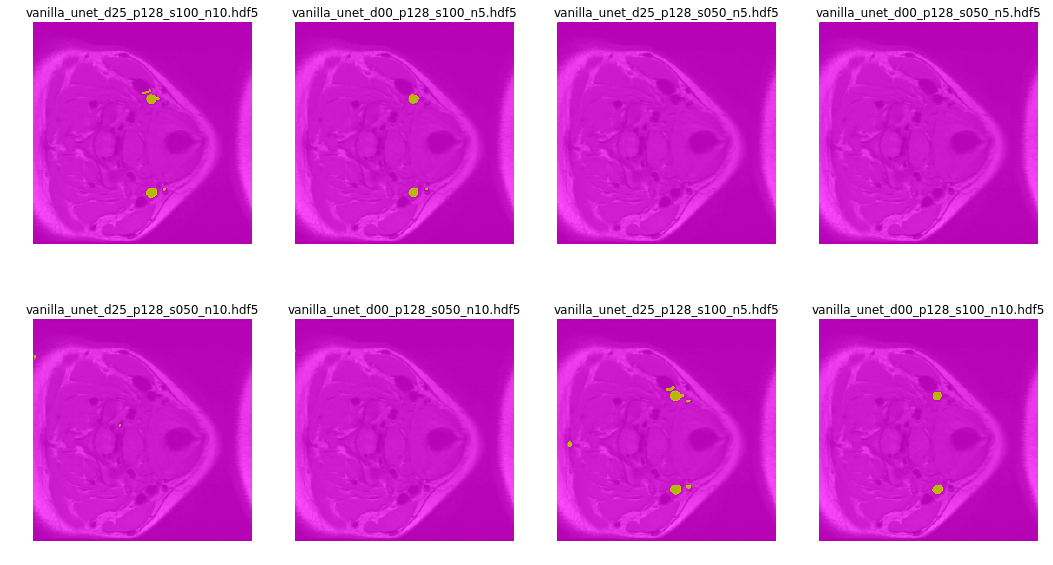

In [31]:

#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (18,10))

for i in range(8):
    ok = fig.add_subplot(2,4, cc) 
    plt.axis("off")
    plt.title(van_models128[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(van_img128[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

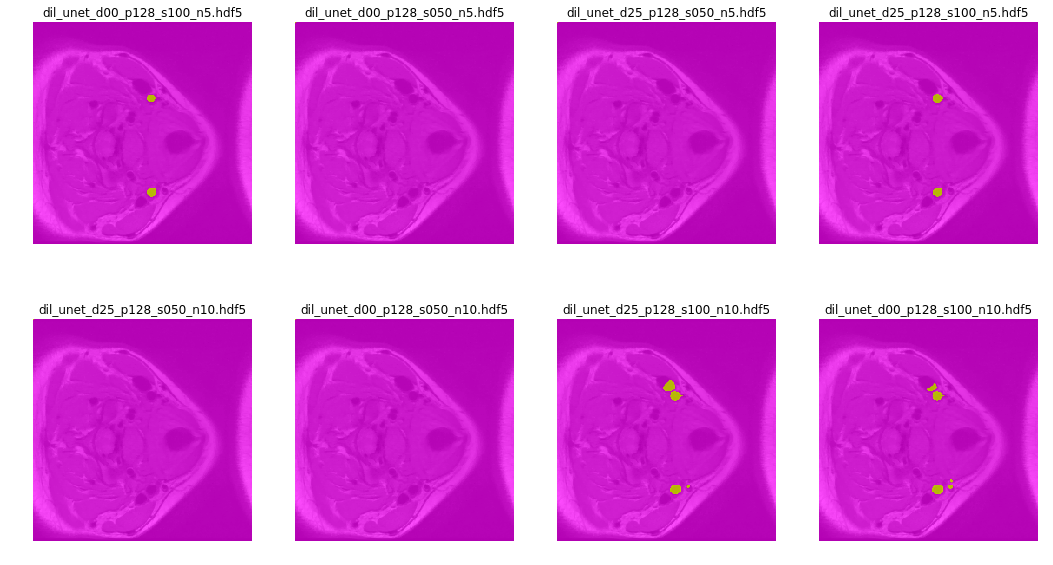

In [32]:

#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (18,10))

for i in range(8):
    ok = fig.add_subplot(2,4, cc) 
    plt.axis("off")
    plt.title(dil_models128[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(dil_img128[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

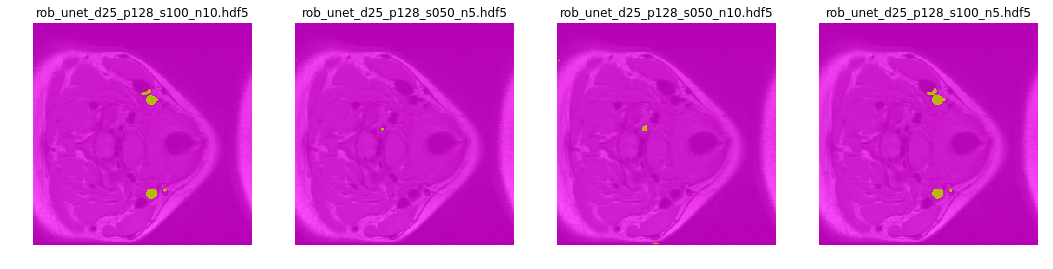

In [33]:

#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (18,10))

for i in range(4):
    ok = fig.add_subplot(2,4, cc) 
    plt.axis("off")
    plt.title(rob_models128[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(rob_img128[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

In [34]:
size256= result["patch.size"]==256


models = np.array(result[size256]["model.name"])
patch=np.array(result[size256]["model.name"])
patch = [p.split("p")[1] for p in patch]
patch = ["p"+p for p in patch]


for i in range(len(models)):
    if "vanilla" in models[i]:
        models[i] = "result/vanilla_unet/"+models[i]+".hdf5"
    elif "rob" in models[i]:
        models[i] = "result/rob_unet/"+models[i]+".hdf5"
    elif "dil" in models[i]:
        models[i] = "result/dil_unet/"+models[i]+".hdf5"
        
#models = [model_info.model_path+"/"+x+".hdf5" for x in models]

predicted_imgs3=[]
#dont ened to generate img_rgb each time.. whatevr

for i in range(len(models)):
    print "iteration ", i,"/",len(models)
    mean_t, std_t = np.load(os.path.join(patch_info.out_path,patch[i]+"_meanstd.npy"))

    if "vanilla" in models[i]:
        unet = vanilla_unet()
    elif "rob" in models[i]:
        unet = rob_unet()
    elif "dil" in models[i]:
        unet = dil_unet()
        

    unet.load_weights(models[i])



    img_rgb = rgb_images(img,period)
    img_rgb = 100.0*(img_rgb-img_rgb.min(axis=(1,2),keepdims = True))/(img_rgb.max(axis=(1,2),keepdims = True)
                                                                       -img_rgb.min(axis=(1,2),keepdims = True))
    img_rgb-=mean_t
    img_rgb/=std_t
    img_rgb,nw,nz  = pad_images(img_rgb)

    predict = unet.predict(img_rgb)
    print predict.shape
    predict = predict.transpose(1,2,0,3)[:-nw,:-nz,:,0]
    print predict.shape
    
    predicted_imgs3.append(predict )
    


van= np.where(["vanilla" in m for m in models])[0]
rob=np.where(["rob" in m for m in models])[0]
dil=np.where(["dil" in m for m in models])[0]

van_img256 = [predicted_imgs3[i] for i in van]
van_models256 = [models[i].split("/")[-1] for i in van]

rob_img256 = [predicted_imgs3[i] for i in rob]
rob_models256 = [models[i].split("/")[-1] for i in rob]

dil_img256 = [predicted_imgs3[i] for i in dil]
dil_models256 = [models[i].split("/")[-1] for i in dil]

    

iteration  0 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  1 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  2 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  3 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  4 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  5 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  6 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  7 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  8 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  9 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  10 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  11 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  12 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  13 / 15
(16, 272, 256, 1)
(256, 252, 16)
iteration  14 / 15
(16, 272, 256, 1)
(256, 252, 16)


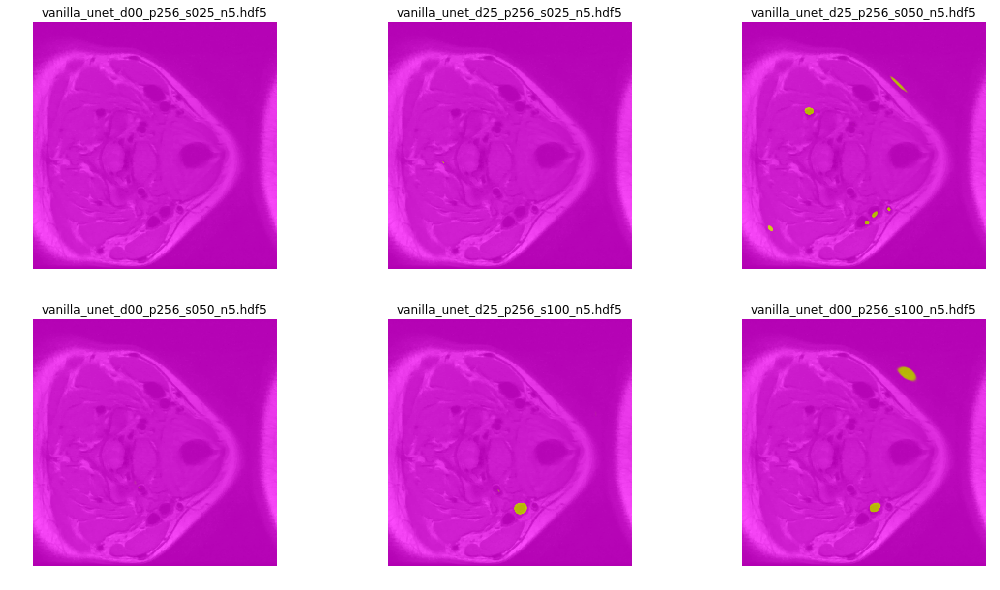

In [36]:

#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (18,10))

for i in range(6):
    ok = fig.add_subplot(2,3, cc) 
    plt.axis("off")
    plt.title(van_models256[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(van_img256[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    

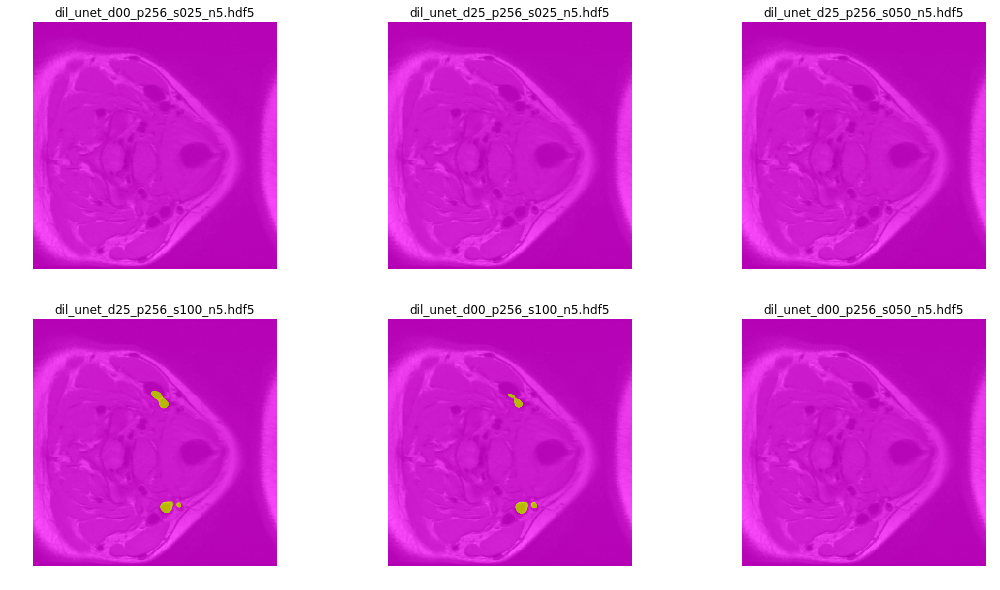

In [37]:

#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (18,10))

for i in range(6):
    ok = fig.add_subplot(2,3, cc) 
    plt.axis("off")
    plt.title(dil_models256[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(dil_img256[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
        

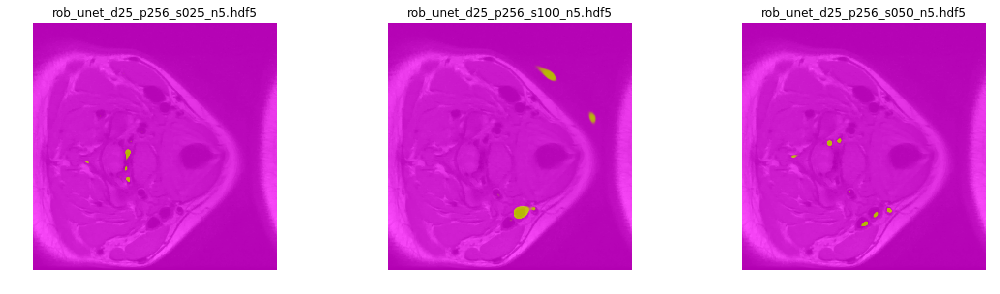

In [38]:

#import matplotlib.pyplot as plt
cc = 1
fig=plt.figure(figsize = (18,10))

for i in range(3):
    ok = fig.add_subplot(2,3, cc) 
    plt.axis("off")
    plt.title(rob_models256[i])
    plt.imshow(img[6,:,:], cmap=plt.cm.gray)
    plt.imshow(rob_img256[i][:,:,6],cmap=plt.cm.spring,alpha=0.7)
    cc += 1 
    